In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 98% 160M/163M [00:01<00:00, 99.8MB/s]
100% 163M/163M [00:01<00:00, 110MB/s] 


In [4]:
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The data set is extracted')


The data set is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data


Importing the Dependencies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
with_mask_files[0:5]


['with_mask_841.jpg',
 'with_mask_1908.jpg',
 'with_mask_2981.jpg',
 'with_mask_1762.jpg',
 'with_mask_3239.jpg']

In [8]:
with_mask_files[-5:]

['with_mask_412.jpg',
 'with_mask_2716.jpg',
 'with_mask_3576.jpg',
 'with_mask_2545.jpg',
 'with_mask_2444.jpg']

In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
without_mask_files[0:5]

['without_mask_629.jpg',
 'without_mask_2629.jpg',
 'without_mask_1630.jpg',
 'without_mask_1378.jpg',
 'without_mask_3554.jpg']

In [10]:
without_mask_files[-5:]

['without_mask_2807.jpg',
 'without_mask_1833.jpg',
 'without_mask_2269.jpg',
 'without_mask_3186.jpg',
 'without_mask_1072.jpg']

In [11]:
len(with_mask_files)

3725

In [12]:
len(without_mask_files)

3828

Creating Labels for the two class of images

with mask - 1
without mask - 0

In [13]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [14]:
with_mask_labels[0:5]

[1, 1, 1, 1, 1]

In [15]:
without_mask_labels[0:5]

[0, 0, 0, 0, 0]

In [16]:
labels = with_mask_labels + without_mask_labels
len(labels)

7553

Displaying Images

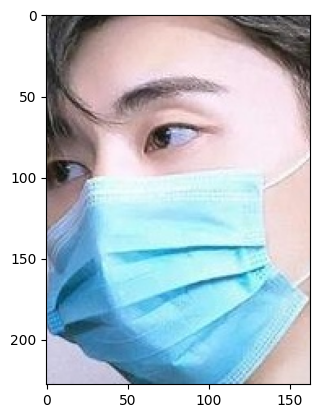

In [17]:
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

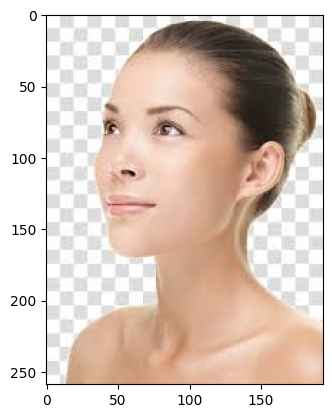

In [18]:
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

In [19]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
len(data)

7553

In [21]:
type(data)

list

array([[[148, 131, 123],
        [163, 146, 135],
        [211, 196, 182],
        ...,
        [ 73,  80,  98],
        [ 71,  81,  97],
        [ 81,  93, 109]],

       [[142, 125, 117],
        [158, 142, 131],
        [205, 191, 177],
        ...,
        [ 72,  80,  97],
        [ 69,  79,  96],
        [ 75,  87, 103]],

       [[134, 118, 110],
        [151, 137, 127],
        [199, 185, 172],
        ...,
        [ 71,  78,  96],
        [ 66,  76,  94],
        [ 66,  78,  94]],

       ...,

       [[148, 183, 202],
        [150, 184, 203],
        [152, 185, 204],
        ...,
        [156, 187, 205],
        [155, 187, 206],
        [153, 186, 205]],

       [[147, 182, 201],
        [149, 183, 202],
        [151, 184, 203],
        ...,
        [156, 186, 205],
        [154, 186, 206],
        [153, 186, 205]],

       [[147, 182, 201],
        [149, 183, 202],
        [151, 184, 203],
        ...,
        [155, 186, 204],
        [154, 186, 206],
        [153, 186, 205]]], dtype=uint8)
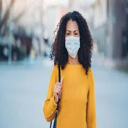

In [22]:
data[0]

In [23]:
type(data[0])

numpy.ndarray

In [24]:
data[0].shape

(128, 128, 3)

3 means red,green and blue

In [25]:
x=np.array(data)
y=np.array(labels)

In [26]:
type(x)

numpy.ndarray

In [27]:
type(y)

numpy.ndarray

In [28]:
x.shape

(7553, 128, 128, 3)

In [29]:
y.shape

(7553,)

In [30]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [31]:
x

array([[[[148, 131, 123],
         [163, 146, 135],
         [211, 196, 182],
         ...,
         [ 73,  80,  98],
         [ 71,  81,  97],
         [ 81,  93, 109]],

        [[142, 125, 117],
         [158, 142, 131],
         [205, 191, 177],
         ...,
         [ 72,  80,  97],
         [ 69,  79,  96],
         [ 75,  87, 103]],

        [[134, 118, 110],
         [151, 137, 127],
         [199, 185, 172],
         ...,
         [ 71,  78,  96],
         [ 66,  76,  94],
         [ 66,  78,  94]],

        ...,

        [[148, 183, 202],
         [150, 184, 203],
         [152, 185, 204],
         ...,
         [156, 187, 205],
         [155, 187, 206],
         [153, 186, 205]],

        [[147, 182, 201],
         [149, 183, 202],
         [151, 184, 203],
         ...,
         [156, 186, 205],
         [154, 186, 206],
         [153, 186, 205]],

        [[147, 182, 201],
         [149, 183, 202],
         [151, 184, 203],
         ...,
         [155, 186, 204],
        

Train Test Split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [33]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


Sacaling the data
255-white
0-black

In [34]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [35]:
x_train_scaled[0]

array([[[0.00392157, 0.00392157, 0.00784314],
        [0.01960784, 0.00784314, 0.00392157],
        [0.04705882, 0.02745098, 0.00784314],
        ...,
        [0.07843137, 0.0745098 , 0.05882353],
        [0.0745098 , 0.07058824, 0.05490196],
        [0.07058824, 0.06666667, 0.05098039]],

       [[0.00392157, 0.00392157, 0.        ],
        [0.03137255, 0.02352941, 0.00392157],
        [0.04705882, 0.05098039, 0.00392157],
        ...,
        [0.07843137, 0.0745098 , 0.05882353],
        [0.0745098 , 0.07058824, 0.05490196],
        [0.07058824, 0.06666667, 0.05098039]],

       [[0.01960784, 0.02352941, 0.        ],
        [0.04313725, 0.03921569, 0.        ],
        [0.05490196, 0.0627451 , 0.00392157],
        ...,
        [0.08235294, 0.07843137, 0.0627451 ],
        [0.07843137, 0.0745098 , 0.05882353],
        [0.0745098 , 0.07058824, 0.05490196]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

Building CNN

In [36]:
import tensorflow as tf
from tensorflow import keras

In [37]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

Training the neural network

In [43]:
history = model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 151s 884ms/step - acc: 0.9477 - loss: 0.1400 - val_acc: 0.9339 - val_loss: 0.2092
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 185s 791ms/step - acc: 0.9649 - loss: 0.1048 - val_acc: 0.9289 - val_loss: 0.2159
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 132s 777ms/step - acc: 0.9717 - loss: 0.0865 - val_acc: 0.9455 - val_loss: 0.2096
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 140s 769ms/step - acc: 0.9765 - loss: 0.0697 - val_acc: 0.9455 - val_loss: 0.2056
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 129s 758ms/step - acc: 0.9739 - loss: 0.0680 - val_acc: 0.9372 - val_loss: 0.2223


**Model Evaluation**

In [40]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)
print('Test Accuracy =',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - acc: 0.9129 - loss: 0.2426
Test Accuracy = 0.9205824136734009


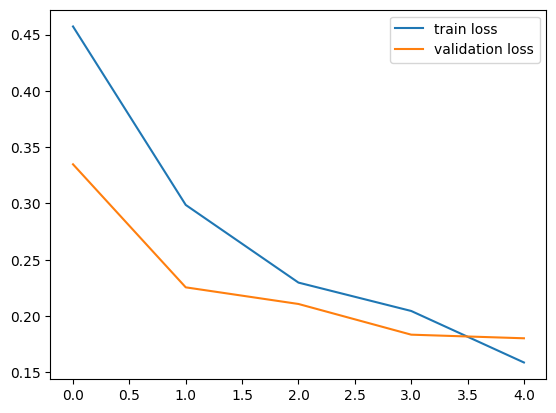

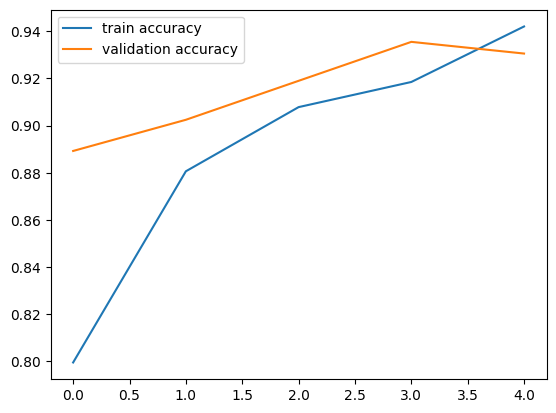

In [41]:
h = history

plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

Predective System

Path of the image to be predicted: /content/images (1).jpeg


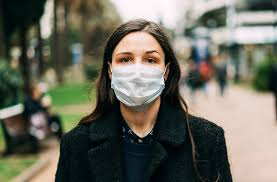

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.18927538 0.6245825 ]]
[1]
The person in the image is wearing a mask


In [48]:
input_image_path =input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = [np.argmax(input_prediction)]

print(input_pred_label)

if input_pred_label[0] == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')
